In [1]:
import pandas as pd
import time
import seaborn as sns
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud
import string
import numpy as np
from collections import Counter

In [2]:
import vaderSentiment
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 1. Load Data

In [3]:
df = pd.read_csv('cleaned_reviews.csv')

In [4]:
df.head()

,rating,reviews,rating_value,clean_reviews
0,Rating 1 out of 5,This is the most difficult review I’ve ever wr...,1,This is the most difficult review Ive ever wri...
1,Rating 5 out of 5,I really enjoyed this on audio!! Over 15 hours...,5,I really enjoyed this on audio Over 15 hours i...
2,Rating 3 out of 5,3.5 ⭐⭐⭐ I listened to Prince Harry reading thi...,3,35 I listened to Prince Harry reading this on...
3,Rating 3 out of 5,My curiosity got the better of me and I read P...,3,My curiosity got the better of me and I read P...
4,Rating 3 out of 5,"So, I have always “liked” Harry. This memoir m...",3,So I have always liked Harry This memoir made ...


# 2. Sentiment analyzer

## Textblob senitment

In [5]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

In [25]:
# Apply textblob sentiment analysis to the 'cleaned_reviews' column and store results in a new column
df['sentiment_blob'] = df['clean_reviews'].apply(analyze_sentiment)


## Vader sentiment

In [24]:
# applying vader sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Define a function to get the sentiment scores for each review
def get_sentiment_scores(review):
    sentiment_scores = sentiment_analyzer.polarity_scores(review)
    return sentiment_scores

# Apply the sentiment analysis function to the review text column
df['sentiment_scores'] = df['reviews'].apply(get_sentiment_scores)

# Extract the compound sentiment score from the sentiment scores dictionary
df['compound_score_vader'] = df['sentiment_scores'].apply(lambda x: x['compound'])

In [22]:
df[45:50]

,rating,reviews,rating_value,clean_reviews,sentiment,sentiment_scores,compound_score_vader,Char_Count,Word_Count,Word_Density
45,Rating 3 out of 5,Seething and jealous Harry absolutely despises...,3,Seething and jealous Harry absolutely despises...,Positive,"{'neg': 0.07, 'neu': 0.816, 'pos': 0.114, 'com...",0.9994,14408,2699,5.338273
46,Rating 1 out of 5,"No way, no how!Why should anyone in their righ...",1,No way no howWhy should anyone in their right ...,Positive,"{'neg': 0.091, 'neu': 0.796, 'pos': 0.113, 'co...",0.9382,1824,333,5.477477
47,Rating 4 out of 5,"\nIf I had a choice, I wouldn't want this life...",4,If I had a choice I wouldnt want this life eit...,Positive,"{'neg': 0.05, 'neu': 0.754, 'pos': 0.196, 'com...",0.9989,3379,632,5.346519
48,Rating 2 out of 5,A disclaimer before I start: I’m in neither “l...,2,A disclaimer before I start Im in neither love...,Positive,"{'neg': 0.119, 'neu': 0.767, 'pos': 0.114, 'co...",-0.8973,7564,1388,5.449568
49,Rating 2 out of 5,the lad's brain is fucking rotted,2,the lads brain is fucking rotted,Negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,32,6,5.333333


# 3. New features

In [8]:
# Calculate number of characters in text
df['Char_Count'] = df['clean_reviews'].apply(len)

# Calculate number of words in text
df['Word_Count'] = df['clean_reviews'].apply(lambda x: len(x.split()))

# Calculate average number of characters in words
df['Word_Density'] = df['Char_Count'] / df['Word_Count']

# 4. Visualisations

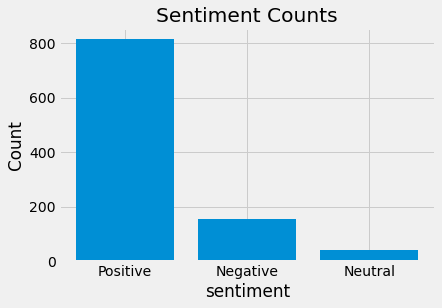

In [26]:
#sentiment labelling
plt.bar(df['sentiment_blob'].unique(), df['sentiment'].value_counts())
plt.title('Sentiment Counts')
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.show()

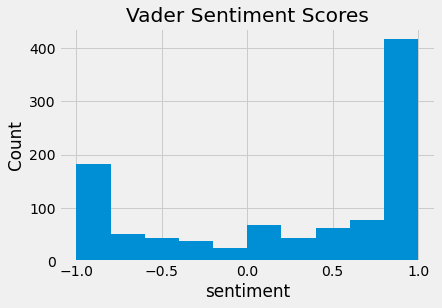

In [10]:
#sentiment labelling
plt.hist(df['compound_score_vader'])
plt.title('Vader Sentiment Scores')
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.show()

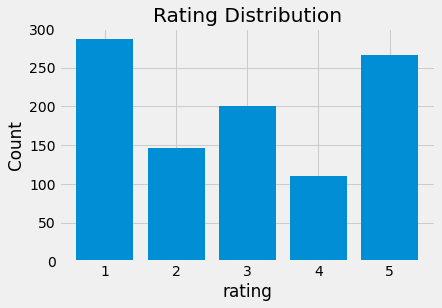

In [11]:
#rating distribution
plt.bar(df['rating_value'].unique(), df['rating_value'].value_counts())
plt.title('Rating Distribution')
plt.xlabel('rating')
plt.ylabel('Count')
plt.show()

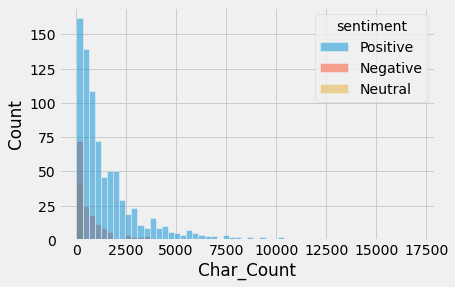

In [12]:
sns.histplot(data=df, x='Char_Count', hue='sentiment', kde=False)
plt.show()

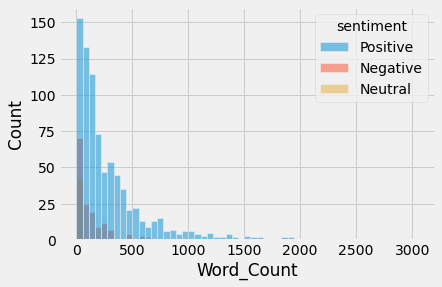

In [13]:
sns.histplot(data=df, x='Word_Count', hue='sentiment', kde=False)
plt.show()

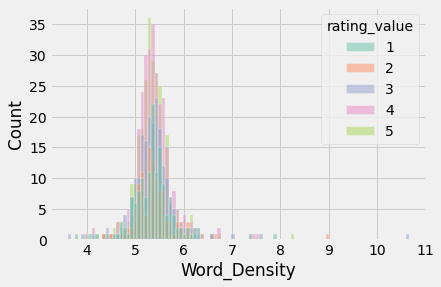

In [14]:
sns.histplot(data=df, x='Word_Density', hue='rating_value', kde=False, palette='Set2')
plt.show()

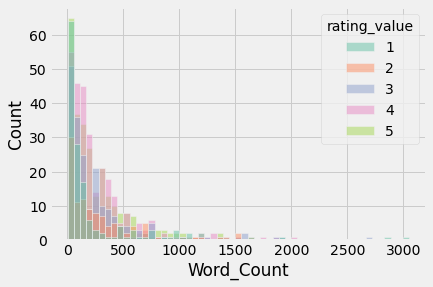

In [15]:

sns.histplot(data=df, x='Word_Count', hue='rating_value', palette='Set2')
plt.show()